Jialin Li

### Different Representations of Geometric Shapes in Monkeys

## Introduction

Geometric intuition has long been considered a hallmark of human intelligence, with the regularity effect—recognizing geometric shapes with Euclidean features (e.g. parallel sides) more quickly and accurately than irregular shapes—serving as compelling evidence. Previous studies have shown the regularity effect on humans across age and cultural contexts, but they have failed to observe it in non-human primates (Sable-Meyer et al., 2021). The explanation attributes this discrepancy to differences in representation: humans use symbolic features for geometric shapes, whereas non-human primates rely on a perceptual way. Two models were used to quantify different representations, one is a biologically plausible CNN (CORnet) and the other one is a symbolic model which contains four common Euclidean features (Kubilius et al., 2018; Sable-Meyer et al., 2021
) (Figure 1 & Figure 2). CORnet has the similar hierarchical structure as the primate brain does, which means the V1 layer in CORnet has the low-level representation of geometric shapes and the IT layer in CORnet has the high-level representation of geometric shapes. However, monkeys did not perform very well in the original study, which left a small possibility that we might see partial evidence of the geometric regularity effect in monkeys if they were given a simpler task. We used a match-to-sample task, which required monkeys to pick the match shape of the sample shape between two alternative shapes (Figure 3). Surprisingly, our findings challenge this account –we demonstrate that non-human primates, through training, can recognize regular shapes more accurately than irregular ones and generalize the regularity effect to novel geometric shapes by using a simpler and more familiar task for monkeys (Figure 4). We wonder if monkeys shared the similar cognitive mechanism as humans did, which means that if monkeys used high-level representations to solve the problems efficiently than low-level representations. Furthermore, we wonder if monkeys also showed some evidence of using the symbolic representations.

### Figure 1: CORnet Structure
<br>

![Table 1:](cornet.png)

### Figure 2: Symbolic Model Structure
<br>

![Table 1:](symbolic.png)

### Figure 3: Match to Sample Task
<br>

![Table 1:](MTS.png)

### Figure 4: Geometric Intuition in Monkeys
<br>

![Table 1:](regularity_effect.png)

### Variables of Interest

**Sub:** The name of monkeys

**Shape Distance Computation:**
 - The difference between geometric shapes is computed by a two stage process because I used the probability of choosing right shape as a variable later.
 - Stage 1: Computing absolute Manhattan distance (L1) / Euclidean distance (L2) between left/right geometric shape and the sample shape. The specific choice of distance depends on the original model.
 - Stage 2: Using the L2 distance between the left shape and the sample shape to subtract the L2 distance between the right shape and the sample shape, so we can know the difference between the difference between each choice and sample.

**Neural Network Representations**
 - **Avg_V1_L2:** The L2 distance between output vectors of geometric shapes from the V1 layer in CORnet. This is a quantification of the low-level representation.
 - **Avg_IT_L2::** The L2 distance between output vectors of geometric shapes from the IT layer in CORnet. This is a quantification of the high-level representation.


**Symbolic Representations**
 - **Avg_SL_Dis:** The L1 distance between output vectors of geometric shapes from the Side Length (SL) property in the symbolic model.
 - **Avg_SP_Dis:**: The L1 distance between output vectors of geometric shapes from the Side Parallel (SP) property in the symbolic model.
 - **Avg_AE_Dis:** The L1 distance between output vectors of geometric shapes from the Equal Angle (AE) property in the symbolic model.
  - **Avg_AR_Dis:** The L1 distance between output vectors of geometric shapes from the Right Angle (AR) property in the symbolic model.


### Hypothesis

We hypotheszied that high-level representations will predict monkeys' behavior better than the low-level representation. 

### Data Plan Organization

- Data Cleansing
    - Select relative columns
    - Remove NA values
- Data Description
- Statistical Analyses
    - Standardized distance scores from different representations
    - Correlation Matrix for distance scores
    - Logistic Regression for each representation
    - Principal Component Analysis (PCA)
    - Stepwise Model Selection


In [ ]:
#load all libraries
library(ggplot2)
library(dplyr)
library(boot)
library(reshape2)
library(lme4)
library(pls)
library(leaps)

In [ ]:
setwd("C:/Users/jialinl2/Li_DSPN_S25/FINAL_PROJECT")
data <- read.csv('final_project.csv')  # Read the CSV file
data <- na.omit(data)
#select relevant columns and scale the data
data <- data %>% select(Sub, Avg_SL_Dis, Avg_SP_Dis, Avg_AE_Dis, Avg_AR_Dis, 
Avg_V1_dis_L2, Avg_IT_dis_L2, Avg_CHOICERIGHT)
data <- data %>% mutate_if(is.numeric, scale)  # Scale the numeric columns
#binary the choiceright
data$Avg_CHOICERIGHT <- ifelse(data$Avg_CHOICERIGHT >0.5, 1, 0) 
data$Sub <- as.factor(data$Sub)
# data$Avg_CHOICERIGHT <- as.factor(data$Avg_CHOICERIGHT)
head(data)

In [ ]:
# Split the data into training and testing
idx <- sample(1:nrow(data), size = 0.7 * nrow(data))  # 70% for training
train_data <- data[idx, ]
test_data <- data[-idx, ]

## Statistical Analysis

#### Statistical Analysis Steps: 

##### Which representations that monkeys used the most in recognizing geometric shapes the best?

1. Standardized distance scores from different representations

2. Correlation Matrix for distance scores

3. Logistic Regression for each predictor

4. Principal Component Analysis (PCA)

5. Stepwise Model Selection

### 1. Standardized distance scores from different representations

In [74]:
data$Avg_V1_dis_L2 <- scale(data$Avg_V1_dis_L2)
data$Avg_IT_dis_L2 <- scale(data$Avg_IT_dis_L2)
data$Avg_SL_Dis <- scale(data$Avg_SL_Dis)
data$Avg_SP_Dis <- scale(data$Avg_SP_Dis)
data$Avg_AE_Dis <- scale(data$Avg_AE_Dis)
data$Avg_AR_Dis <- scale(data$Avg_AR_Dis)


### 2. Correlation Matrix for distance scores

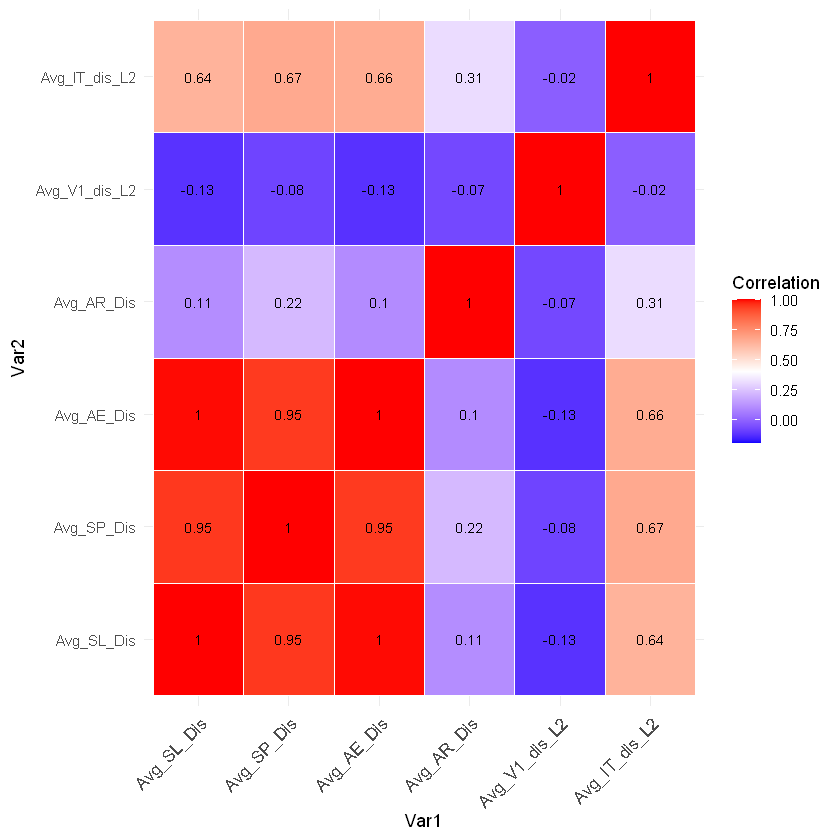

In [75]:
cor <- melt(as.matrix(cor(data[, -c(1, ncol(data))])))

ggplot(data = cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), size = 3) +  
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0.4, limit = c(-0.2,1), space = "Lab",
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 10, hjust = 1))


According to the correlation matrix, all predictors except AR in the symbolic model and V1 layer in CORnet are highly correlated with each other, which suggests us to do a separate logistic regression instead of a multivariate logistic regression.

### 3. Logistic Regression for each representation 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


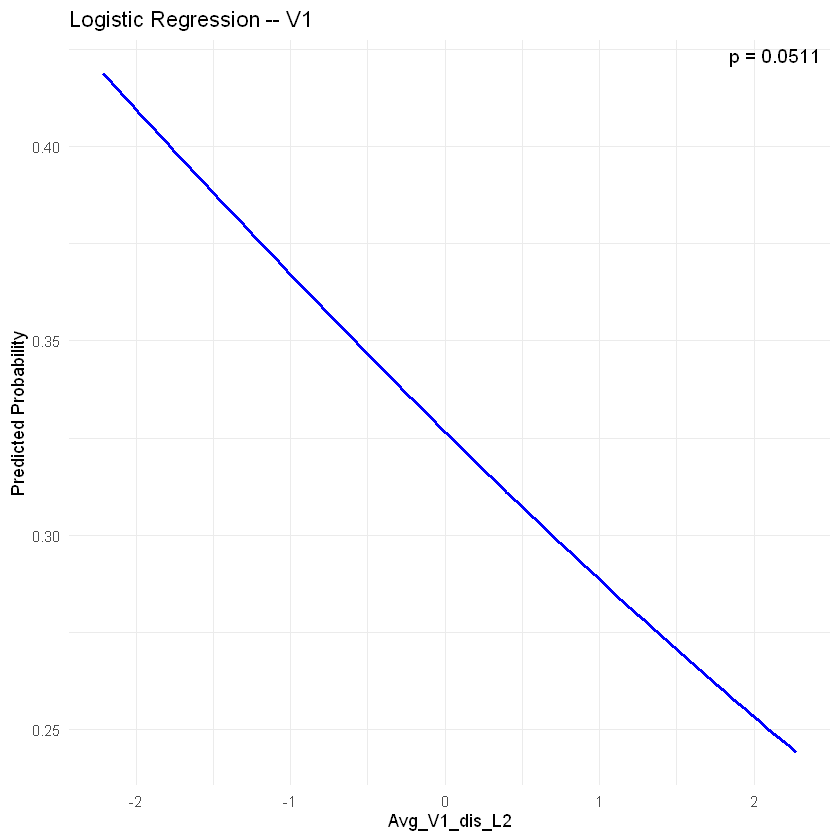

`geom_smooth()` using formula = 'y ~ x'


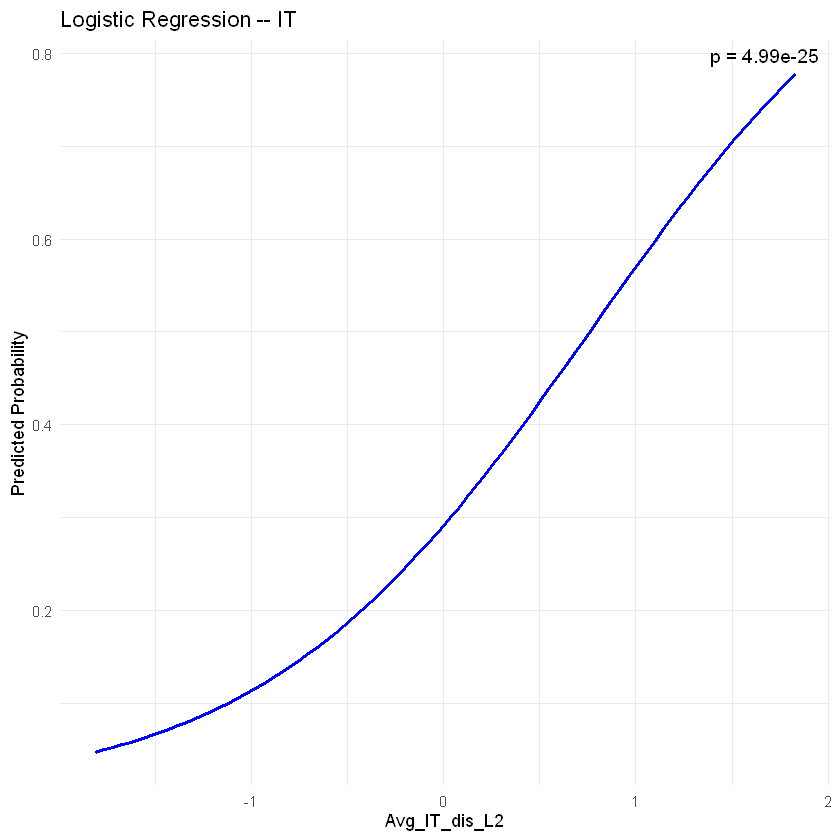

`geom_smooth()` using formula = 'y ~ x'


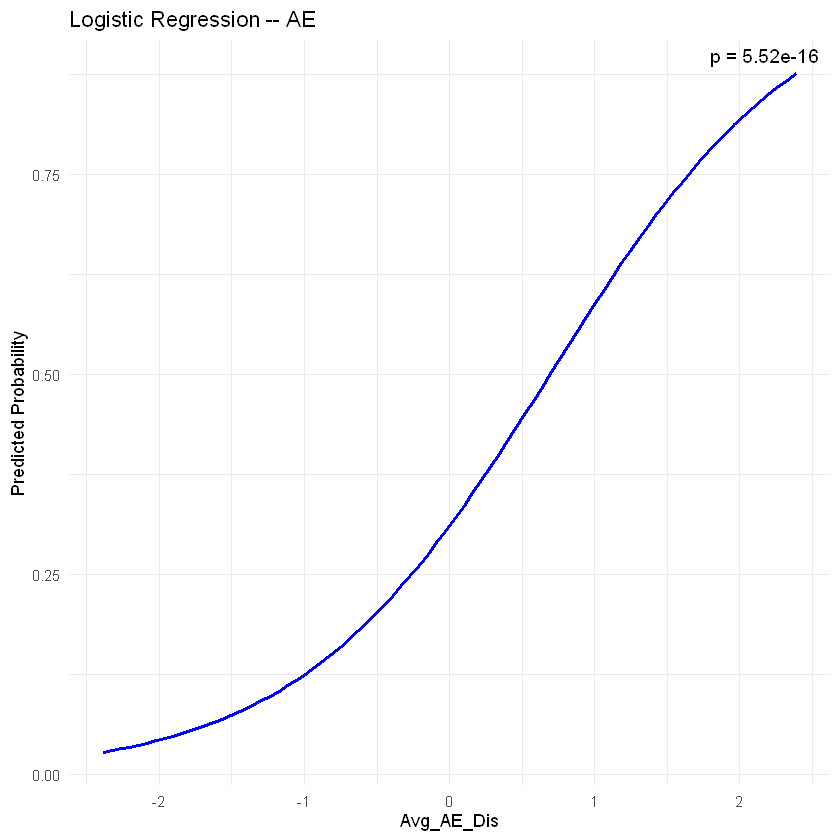

`geom_smooth()` using formula = 'y ~ x'


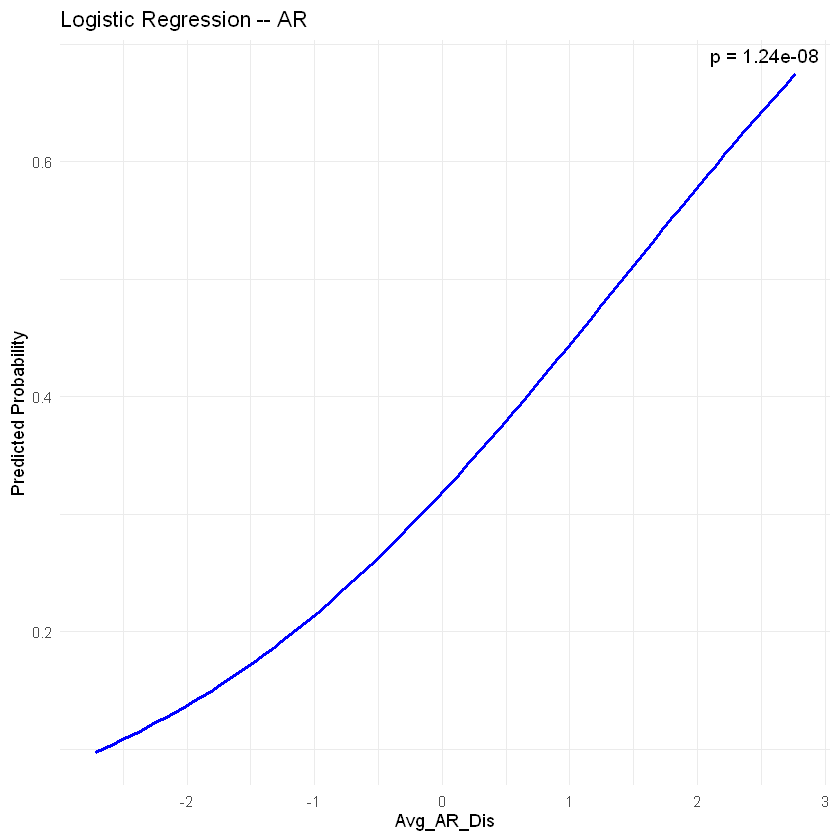

`geom_smooth()` using formula = 'y ~ x'


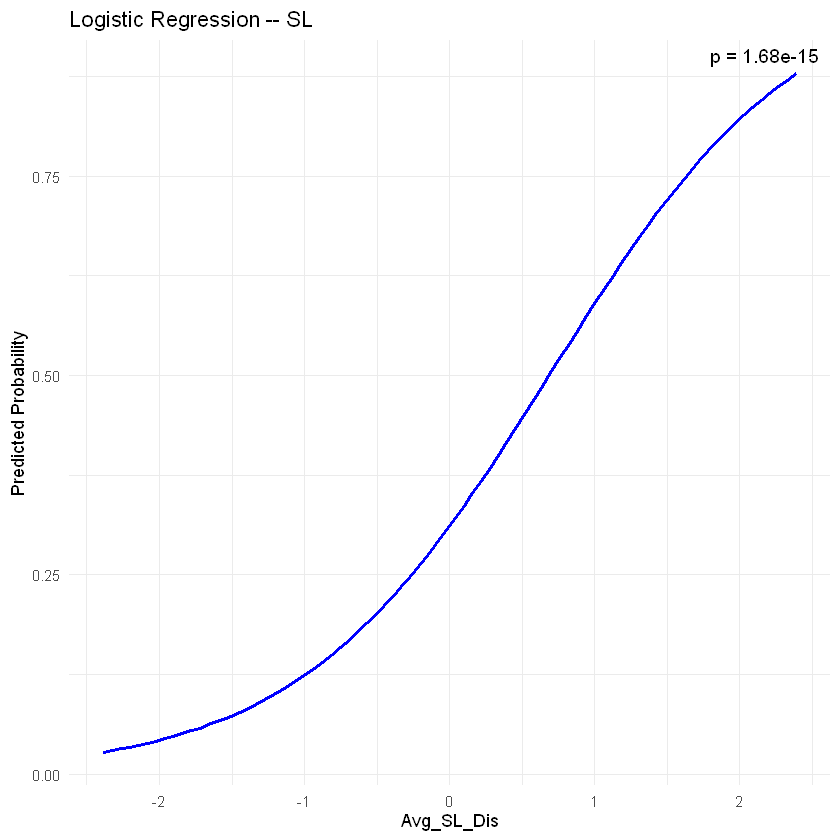

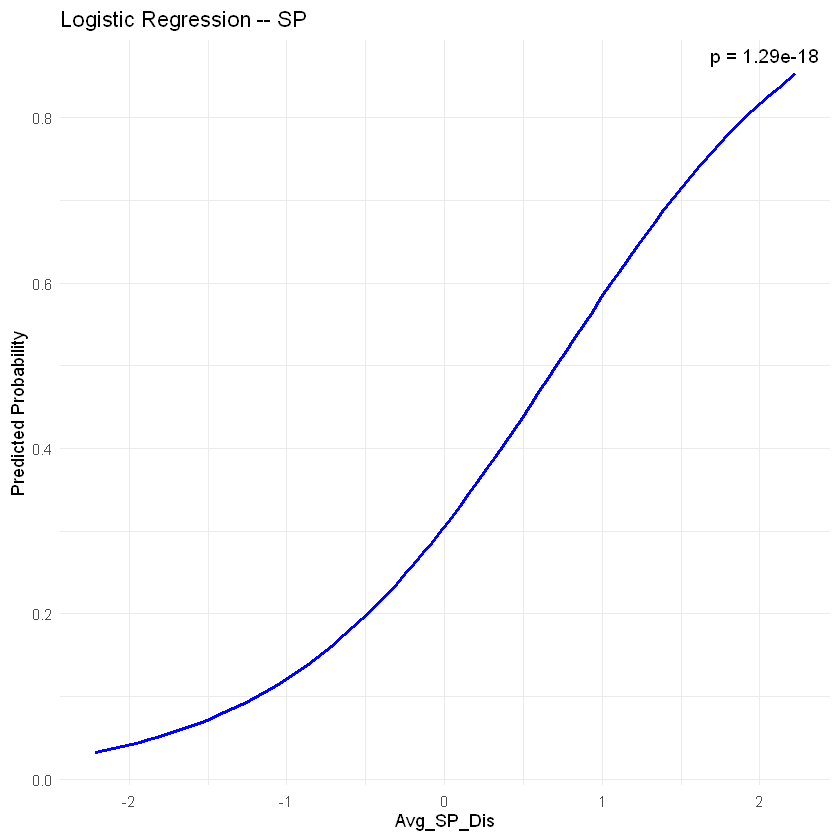

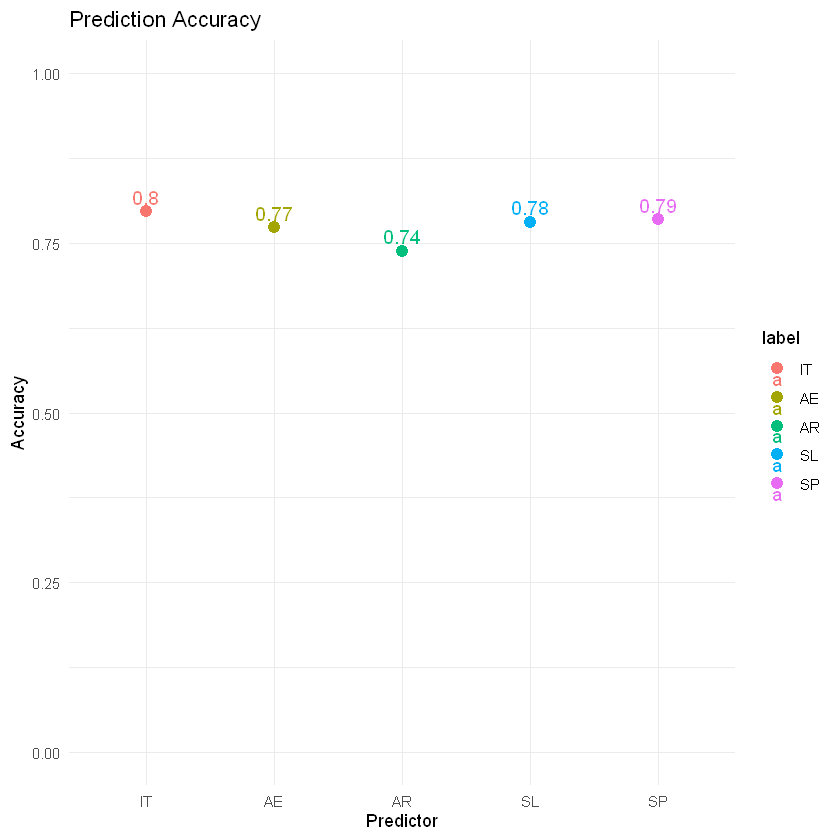

In [79]:
results <- data.frame(actual = test_data$Avg_CHOICERIGHT, predicted_V1 = NA, predicted_IT = NA, predicted_AE = NA, predicted_AR = NA, predicted_SL = NA, predicted_SP = NA)

V1.fit <- glmer(Avg_CHOICERIGHT ~ Avg_V1_dis_L2 + (1 | Sub), data = train_data, family = binomial(link = "logit"))
IT.fit <- glmer(Avg_CHOICERIGHT ~ Avg_IT_dis_L2 + (1 | Sub), data = train_data, family = binomial(link = "logit"))
AE.fit <- glmer(Avg_CHOICERIGHT ~ Avg_AE_Dis + (1 | Sub), data = train_data, family = binomial(link = "logit"))
AR.fit <- glmer(Avg_CHOICERIGHT ~ Avg_AR_Dis + (1 | Sub), data = train_data, family = binomial(link = "logit"))
SL.fit <- glmer(Avg_CHOICERIGHT ~ Avg_SL_Dis + (1 | Sub), data = train_data, family = binomial(link = "logit"))
SP.fit <- glmer(Avg_CHOICERIGHT ~ Avg_SP_Dis + (1 | Sub), data = train_data, family = binomial(link = "logit"))

model_list <- list(
  V1 = list(fit = V1.fit, predictor = "Avg_V1_dis_L2"),
  IT = list(fit = IT.fit, predictor = "Avg_IT_dis_L2"),
  AE = list(fit = AE.fit, predictor = "Avg_AE_Dis"),
  AR = list(fit = AR.fit, predictor = "Avg_AR_Dis"),
  SL = list(fit = SL.fit, predictor = "Avg_SL_Dis"),
  SP = list(fit = SP.fit, predictor = "Avg_SP_Dis")
)


for (name in names(model_list)) {
  fit <- model_list[[name]]$fit
  predictor <- model_list[[name]]$predictor
  
  pval <- summary(fit)$coefficients[2, "Pr(>|z|)"]
  pval_text <- paste0("p = ", signif(pval, 3))
  
  lr_plot <- ggplot(train_data, aes_string(x = predictor, y = "Avg_CHOICERIGHT")) +
    stat_smooth(method = "glm", method.args = list(family = "binomial"),
                se = FALSE, color = "blue", size = 1) +
    annotate("text", x = Inf, y = Inf, label = pval_text, 
             hjust = 1.1, vjust = 1.5, size = 4) +
    labs(title = paste("Logistic Regression --", name),
         x = predictor,
         y = "Predicted Probability") +
    theme_minimal()

    print(lr_plot)

}

# Make predictions on test data
results <- data.frame(actual = test_data$Avg_CHOICERIGHT)
results$predicted_V1 <- ifelse(predict(V1.fit, test_data, type = "response") > 0.5, 1, 0)
results$predicted_IT <- ifelse(predict(IT.fit, test_data, type = "response") > 0.5, 1, 0)
results$predicted_AE <- ifelse(predict(AE.fit, test_data, type = "response") > 0.5, 1, 0)
results$predicted_AR <- ifelse(predict(AR.fit, test_data, type = "response") > 0.5, 1, 0)
results$predicted_SL <- ifelse(predict(SL.fit, test_data, type = "response") > 0.5, 1, 0)
results$predicted_SP <- ifelse(predict(SP.fit, test_data, type = "response") > 0.5, 1, 0)

# Calculate accuracy
label <- c("IT", "AE", "AR", "SL", "SP")
accuracy <- c(
  # mean(results$predicted_V1 == results$actual),
  mean(results$predicted_IT == results$actual),
  mean(results$predicted_AE == results$actual),
  mean(results$predicted_AR == results$actual),
  mean(results$predicted_SL == results$actual),
  mean(results$predicted_SP == results$actual)
)
df <- data.frame(label = factor(label, levels = label), accuracy = accuracy)

# Plot prediction accuracy
ggplot(data = df, aes(x = label, y = accuracy, color = label)) +
  geom_point(size = 3) +
  geom_text(aes(label = round(accuracy, 2)), vjust = -0.5, size = 4) +
  labs(title = "Prediction Accuracy", x = "Predictor", y = "Accuracy") +
  ylim(0, 1) +
  theme_minimal()


The logistic results showed that all logistic regression are significant except V1 layer in CORnet, while the Right Angle Component in the symbolic model has the lowest prediction accuracy in the testing set and the IT has the highest one. However, all prediction accuracies are very high (above 70%). To futher investigate which high-level representation explains the behavior best, we are going to do a PCA analysis.

### 4. Principal Component Analysis (PCA)

[1] 4

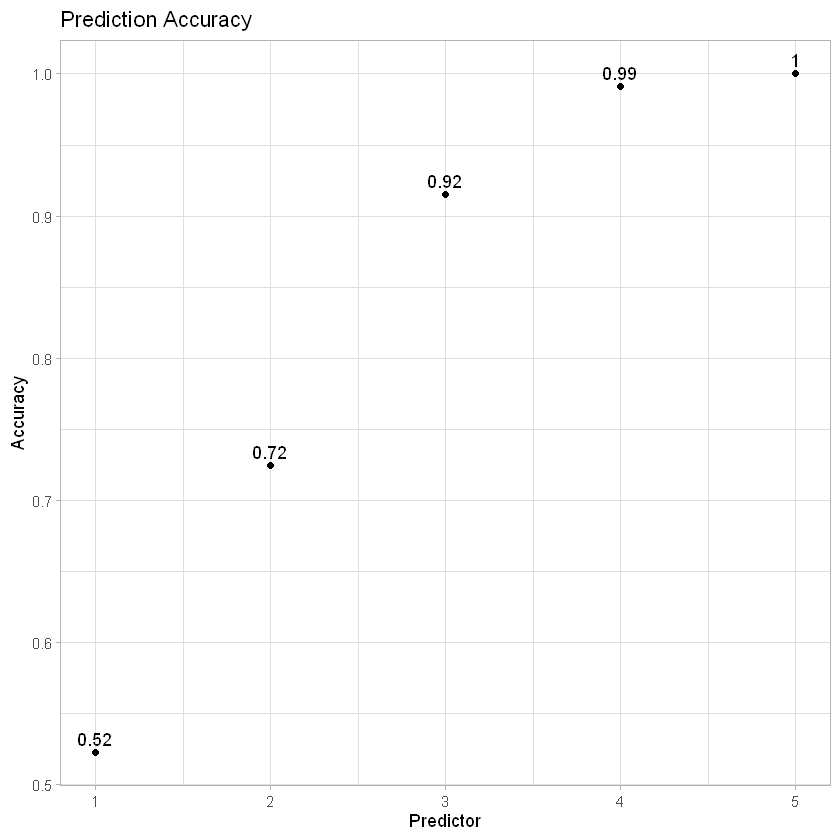

In [80]:
# PCA
pca <- prcomp(data[, -c(1, 2, ncol(data))], scale. = TRUE)
result1<-data.frame(pc=1: 1:length(pca$sdev), var.exp= cumsum(pca$sdev^2/sum(pca$sdev^2)))
ggplot(result1,
        aes(x=pc,y=var.exp)) +
    geom_point() +
    geom_text(aes(label = round(var.exp, 2)), vjust = -0.5) +
    labs(title = "Prediction Accuracy", x = "Predictor", y = "Accuracy") +
    theme_light()
which(result1$var.exp >= 0.95)[1]

The first 4 components are not highly correlated because the minumum components to explained 95% data is 4.

Data: 	X dimension: 853 5 
	Y dimension: 853 1
Fit method: svdpc
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV          0.4693   0.4253   0.4211   0.4167   0.4168   0.4168
adjCV       0.4693   0.4253   0.4210   0.4166   0.4167   0.4166

TRAINING: % variance explained
                 1 comps  2 comps  3 comps  4 comps  5 comps
X                  70.00    90.39    98.76    99.93   100.00
Avg_CHOICERIGHT    17.86    19.75    21.58    21.70    22.09


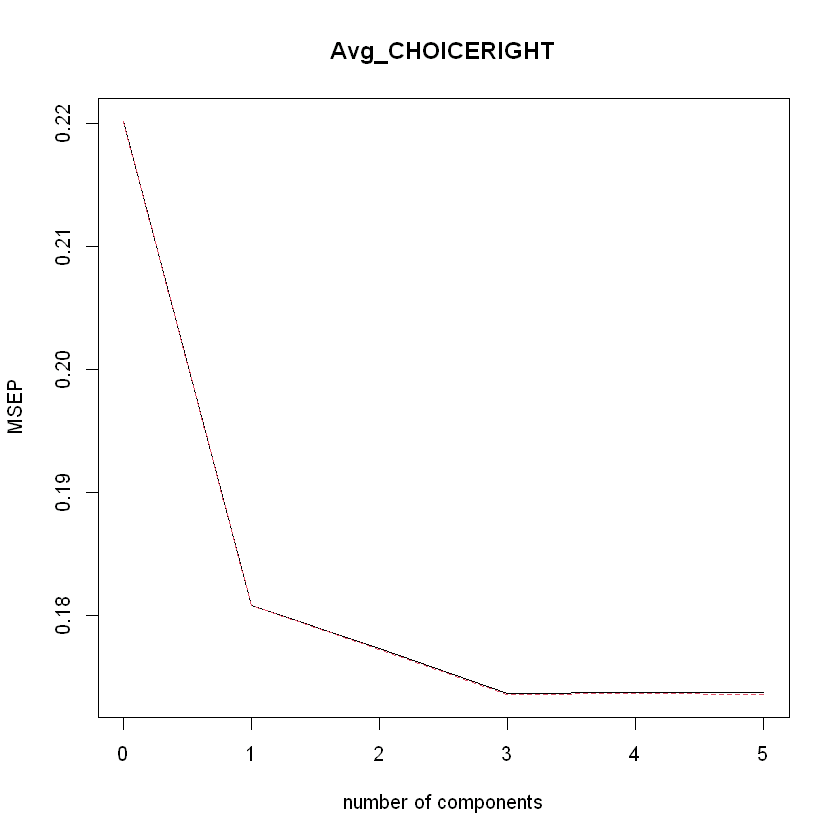

In [81]:
pcr.fit=pcr(Avg_CHOICERIGHT ~ Avg_IT_dis_L2 + Avg_AE_Dis + Avg_AR_Dis + Avg_SP_Dis + Avg_SL_Dis, data=data[-1] ,scale=TRUE, validation ="CV")
summary(pcr.fit)
validationplot(pcr.fit,val.type="MSEP") # MSEP shows cross-validated mean-squared error as error metric.

In [82]:
msep_array <- MSEP(pcr.fit, estimate = 'CV')
msep_array <- as.array(msep_array)
msep_array <- as.array(drop(msep_array))
str(msep_array)
msep_array
which.min(msep_array$val[1,1,])

List of 5
 $ val       : num [1, 1, 1:6] 0.22 0.181 0.177 0.174 0.174 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ estimate: chr "CV"
  .. ..$ response: chr "Avg_CHOICERIGHT"
  .. ..$ model   : chr [1:6] "(Intercept)" "1 comps" "2 comps" "3 comps" ...
 $ type      : chr "MSEP"
 $ comps     : num [1:6] 0 1 2 3 4 5
 $ cumulative: logi TRUE
 $ call      : language MSEP.mvr(object = pcr.fit, estimate = "CV")
 - attr(*, "class")= chr "mvrVal"
 - attr(*, "dim")= int 5
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:5] "val" "type" "comps" "cumulative" ...


(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     0.2202       0.1809       0.1773       0.1737       0.1737       0.1737  

3 comps 
      4

The result showed using the IT layer in CORnet and two components in the symbolic model provided the best predictive performance with the lowest cross-validated error in explaining the behavior of monkeys, which might indicates that Side Length and the Side Parallel components are redundant in representing the geometric shapes.

In [83]:
regfit.forward = regsubsets(Avg_CHOICERIGHT ~  Avg_IT_dis_L2 + Avg_AE_Dis + Avg_AR_Dis + Avg_SP_Dis+ Avg_SL_Dis, data = data, method = "forward")
regfit.forward.sum = summary(regfit.forward)
regfit.forward.sum


Subset selection object
Call: regsubsets.formula(Avg_CHOICERIGHT ~ Avg_IT_dis_L2 + Avg_AE_Dis + 
    Avg_AR_Dis + Avg_SP_Dis + Avg_SL_Dis, data = data, method = "forward")
5 Variables  (and intercept)
              Forced in Forced out
Avg_IT_dis_L2     FALSE      FALSE
Avg_AE_Dis        FALSE      FALSE
Avg_AR_Dis        FALSE      FALSE
Avg_SP_Dis        FALSE      FALSE
Avg_SL_Dis        FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: forward
         Avg_IT_dis_L2 Avg_AE_Dis Avg_AR_Dis Avg_SP_Dis Avg_SL_Dis
1  ( 1 ) "*"           " "        " "        " "        " "       
2  ( 1 ) "*"           " "        " "        " "        "*"       
3  ( 1 ) "*"           " "        "*"        " "        "*"       
4  ( 1 ) "*"           "*"        "*"        " "        "*"       
5  ( 1 ) "*"           "*"        "*"        "*"        "*"       

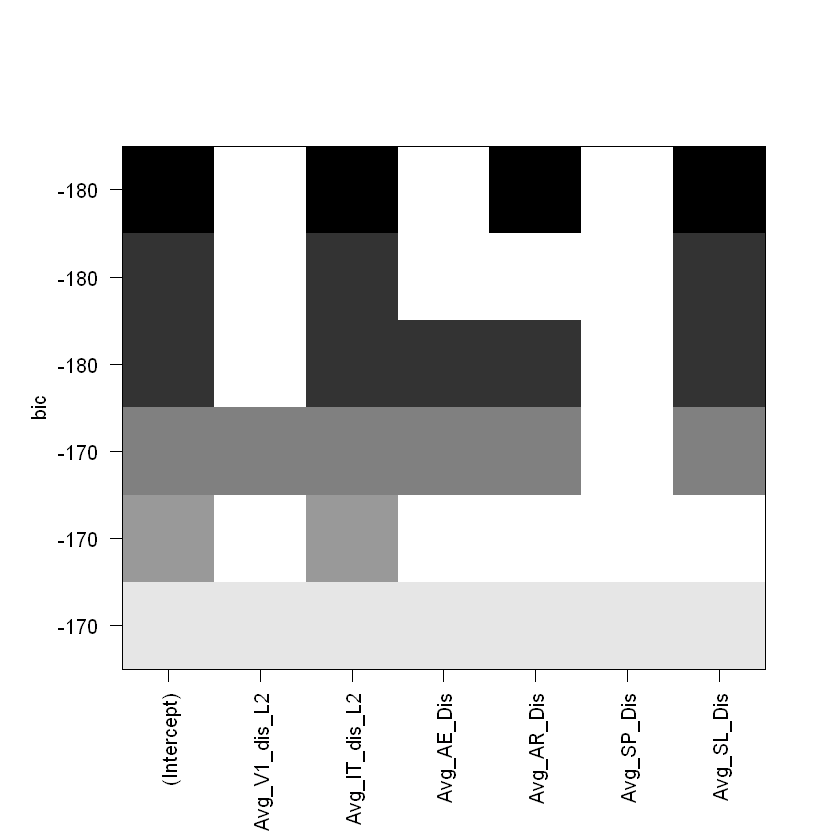

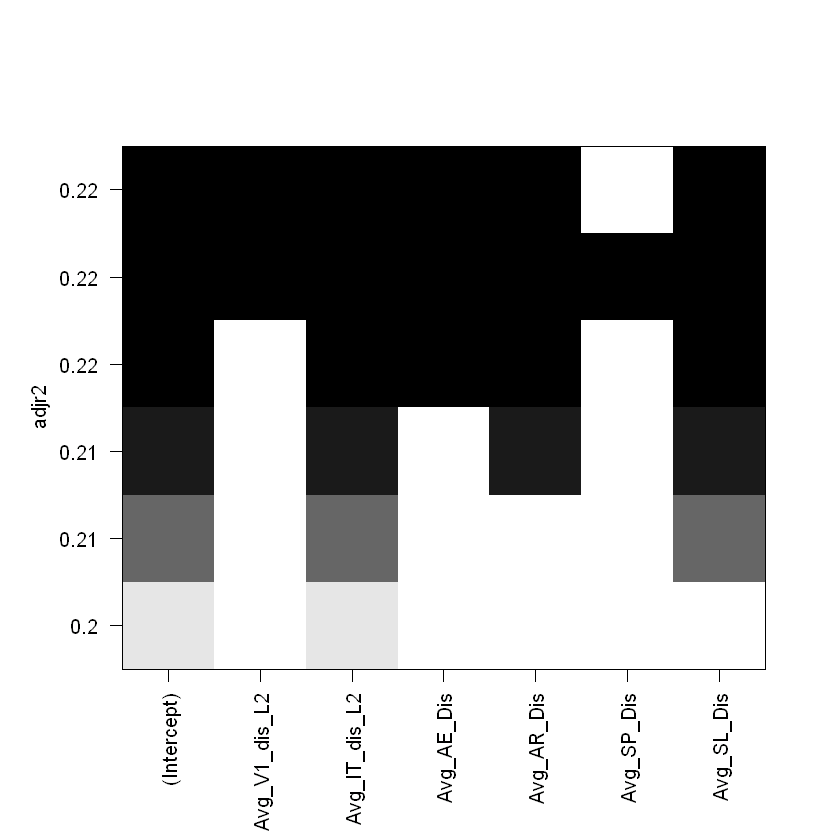

[1] 3

[1] 5

[1] 5

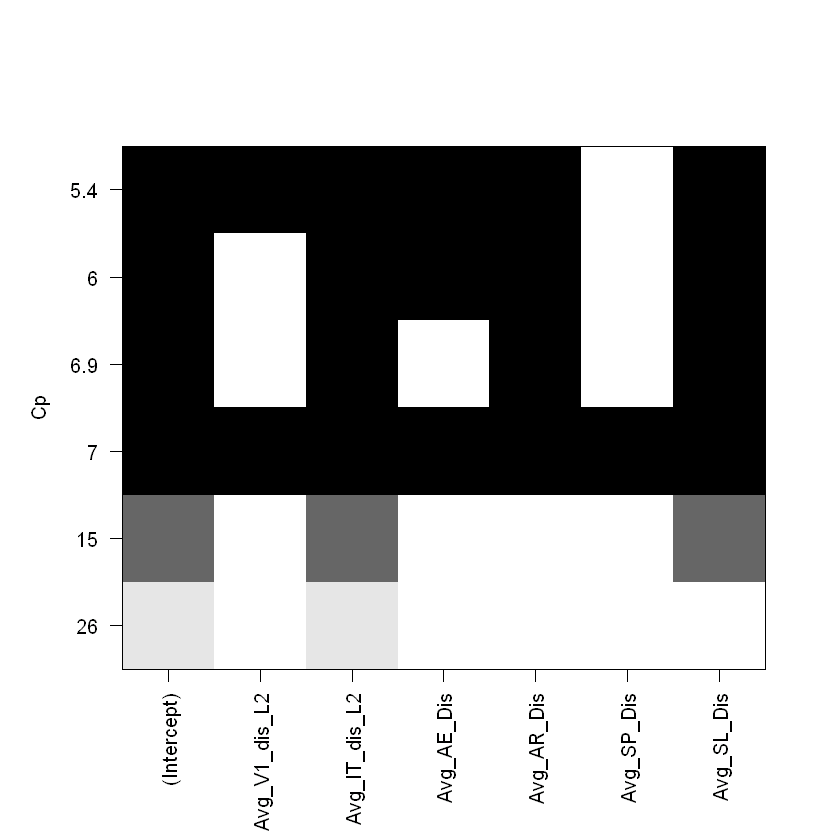

In [77]:
plot(regfit.forward, scale="bic")
plot(regfit.forward, scale="adjr2")
plot(regfit.forward, scale="Cp")
which.min(regfit.forward.sum$bic)
which.max(regfit.forward.sum$adjr2)
which.min(regfit.forward.sum$cp)
     

According to the results of forward model selection, the best model from BIC is the one contains IT, AE, and AR representations, while the best model from adjusted R squared and Mallows' Cp contains one more component Side Length. This result is consistent with the PCA result.

### Conclusions

Here we tested the hypothesis that monkeys used visual information in their decisions; we hypothesized that high-level representations would predict monkeys’ behavior better than low-level representations. First we found that the low-level representations did not predict the behavior well because the p-value is not significant in its logistic regression results, while all high-level representations can predict the monkeys behavior well. Furthermore, we found that using the IT layer in CORnet and the two angle-related components in the symbolic model have the best balance of fit and model complexity.
